In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
#讀入 Fashion MNIST 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
#欣賞數據集內容

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

這個東西是: Shirt


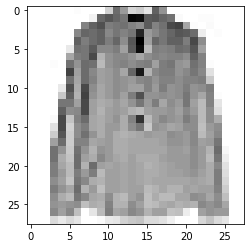

In [10]:
n = 3642
print("這個東西是: "+class_names[y_train[n]])
plt.imshow(x_train[n], cmap="Greys");

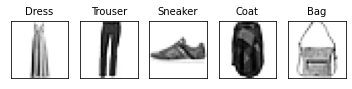

In [11]:
pick = np.random.choice(60000, 5, replace=False)
for i in range(5):
  n = pick[i]
  ax = plt.subplot(151+i)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(class_names[y_train[n]], fontsize=10)
  plt.imshow(x_train[n], cmap="Greys")

In [0]:
#資料整理

In [0]:
x_train = x_train.reshape(len(x_train), 784)/255

In [0]:
x_test = x_test.reshape(len(x_test), 784)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

In [0]:
#打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(324, input_dim=784, activation='relu')) ###這裡用324個神經元

In [0]:
model.add(Dense(324, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [0]:
#組裝神經網路

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.87), metrics=['accuracy']) ###lr改成0.87

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 324)               254340    
_________________________________________________________________
dense_1 (Dense)              (None, 324)               105300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3250      
Total params: 362,890
Trainable params: 362,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
#訓練

In [28]:
model.fit(x_train, y_train, batch_size=200, epochs=40) ###batch_size改成200，epochs改成40

Epoch 1/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.7081
Epoch 2/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.8177
Epoch 3/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.8349
Epoch 4/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.8458
Epoch 5/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0214 - accuracy: 0.8555
Epoch 6/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0207 - accuracy: 0.8600
Epoch 7/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.8651
Epoch 8/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.8720
Epoch 9/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.8737
Epoch 10/40
300/300 [==============================] - 1s 2ms/step - loss: 0.0183 - accuracy: 0.8776

In [0]:
#訓練成果

In [30]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


神經網路預測是:  T-shirt/top


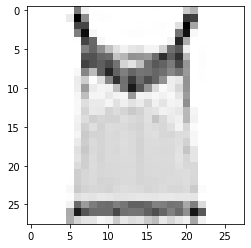

In [31]:
n = 5566
print('神經網路預測是: ', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')